In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('..\DataSets\Social_Network_Ads.csv')

In [3]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
x = data.iloc[:,0:2].values

In [5]:
x.shape

(400, 2)

In [6]:
y  = data.iloc[:,-1].values

In [7]:
y.shape

(400,)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [9]:
X_train.shape

(320, 2)

In [10]:
X_test.shape

(80, 2)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)

In [13]:
X_train

array([[ 2.07215543,  0.58195319],
       [-0.14908896, -1.06977655],
       [ 0.23721441,  0.10144999],
       [ 1.39612453,  1.36277089],
       [-0.05251311,  0.25160724],
       [ 0.04406273, -0.22889596],
       [-1.30799907, -0.31899031],
       [ 0.04406273, -0.28895886],
       [ 0.04406273,  1.30270799],
       [-0.14908896,  1.72314829],
       [ 2.16873127,  1.18258219],
       [-0.2456648 , -1.37009105],
       [ 1.87900374, -1.06977655],
       [ 0.91324531, -0.76946206],
       [-0.2456648 , -0.88958786],
       [ 1.106397  , -0.10877016],
       [-0.9216957 ,  0.61198464],
       [-0.43881649, -1.12983945],
       [-0.53539233, -1.5202483 ],
       [-1.50115076, -1.5202483 ],
       [ 0.23721441,  0.07141854],
       [-1.21142323,  0.64201609],
       [ 0.14063857,  1.96339989],
       [-1.11484738, -0.49917901],
       [ 1.7824279 ,  1.06245639],
       [ 0.4303661 ,  0.04138709],
       [ 1.97557958,  2.26371439],
       [ 1.00982116,  0.82220479],
       [-0.63196817,

In [14]:
X_test = scaler.transform(X_test)

In [15]:
X_test

array([[-1.11484738,  0.37173304],
       [-0.14908896,  1.69311684],
       [-1.01827154,  0.82220479],
       [ 0.4303661 , -0.10877016],
       [-0.43881649, -0.25892741],
       [-0.2456648 , -0.34902176],
       [ 1.00982116,  1.87330554],
       [-0.82511986, -0.76946206],
       [-0.05251311,  2.32377728],
       [-1.01827154, -0.31899031],
       [-0.14908896,  0.91229914],
       [-0.53539233,  0.52189029],
       [ 0.04406273,  0.07141854],
       [-0.2456648 , -0.55924191],
       [-1.01827154, -0.31899031],
       [-0.9216957 ,  1.63305394],
       [ 1.106397  ,  0.58195319],
       [-1.30799907, -1.24996525],
       [ 0.91324531, -1.4601854 ],
       [-1.40457491, -1.4601854 ],
       [-0.05251311,  2.05349424],
       [-1.11484738,  1.48289669],
       [-1.69430244,  0.52189029],
       [-0.2456648 ,  0.85223624],
       [-1.01827154,  2.05349424],
       [-1.40457491, -0.61930481],
       [ 0.4303661 ,  2.41387163],
       [-0.9216957 , -0.73943061],
       [-1.21142323,

In [16]:
np.sqrt(X_train.shape[0])

17.88854381999832

In [17]:
k = 17

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [20]:
y_pred = knn.predict(X_test)

In [21]:
y_pred.shape

(80,)

In [22]:
y_test.shape

(80,)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9125

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[42,  3],
       [ 4, 31]], dtype=int64)

In [25]:
accuracy = []
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [26]:
len(accuracy)

25

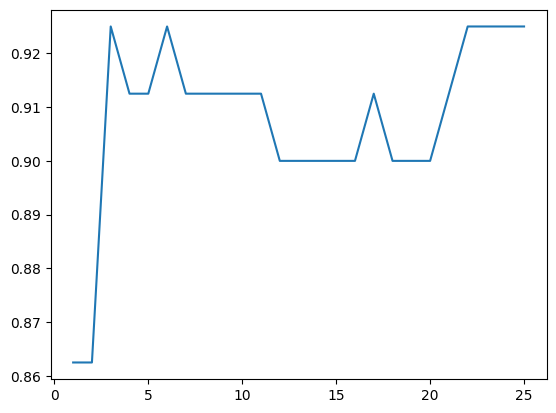

In [27]:
plt.plot(range(1,26),accuracy)

In [28]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [29]:
y_pred=knn.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.9125

In [38]:
def predictOutput():
    age=int(input('Enter the age'))
    salary = int(input('enter the salary'))


    X_new =np.array([[age],[salary]]).reshape(1,2)
    X_new = scaler.transform(X_new)

    if knn.predict(X_new)[0]==0:
        return "will not purchase"
    else:
        return 'will purchase'

In [39]:
predictOutput()

'will purchase'

### Few Observations
#### 1. Hyperparameters
#### 2. Method to choose k

#### ----->method 1 k=17
#### ----->method 2 k=11

#### What is decision boundary?
decision boundary divide the entire cordinate system into the no of classes that present in the dataset , and accroding to the decision boundary every point on your cordinate system will have one class

### importants points
+ we can draw decision boundary for all the classification algo including neural  networks
+ decision boundary are not always clear cut,that is the transition from one class in the feature space to another is not discontinuous but gradual this effect is common in fuzzy logic based classification algo,where memberhip in one class or another is ambigous
+ decision boundary can be both linear(as in the case of svm) or non linear(as in the case of decision tree classifier or knn)

+ for higher dimension problems the decision boundary acts as a hyperplane(for liner ones)

#### Vornoi Diagram
in mathematics  A varnoi diagram is a partioning of a plane inot regions based on distnace to points in a specific subset of the plane

 ### Steps to plot Decision Boundary for Knn (Assuming 2 input cols)

+ Train the classifier on the training set.

+ Create a uniform grid (with the help of Numpy Meshgrids) of points that densely cover the region of input space containing
   the training set.

+ Classify each point on the grid. Store the results in an array A, where Aij contains the predicted class for the point at row i,
   column j on the grid.

+ Plot the array as an image, where each pixel corresponds to a grid point and its color represents the predicted class. The
   decision boundary can be seen as contours where the image changes color.

+ Finally print out the training data with their respective color on the same contour


### Meshgrid
meshgrids are basically cordinate system genrated by 2 input arrays


In [46]:
# creating a meshgrid
x = np.array([1,2,3])
y = np.array([4,5,6])

XX,YY = np.meshgrid(x,y)


### purpose of Meshgrid
Meshgrid is very useful to evaluate functions on a grid. We can apply any fucntion to the points of a meshgrid to plot a function

In [55]:
# plotting a fucntion using meshgrid
x = np.linspace(-40,40,1000)
y = np.linspace(-50,50,900)

XX,YY = np.meshgrid(x,y)

In [56]:
Z = np.random.random((900,1000))

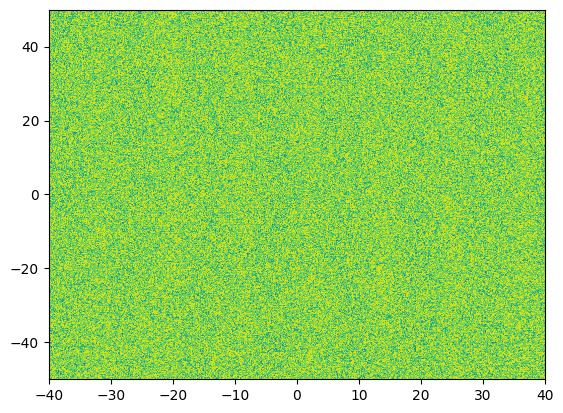

In [57]:
plt.contourf(XX,YY,Z)

### step 2: Creating a Meshgrid

In [63]:
a = np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b = np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)


XX,YY = np.meshgrid(a,b)

### step 3 classifiying every point on the meshgrid

In [72]:
input_array = np.array([XX.ravel(), YY.ravel()]).T

labels = knn.predict(input_array)

In [74]:
labels.shape

(367236,)

### step 4: plotting the array as in image

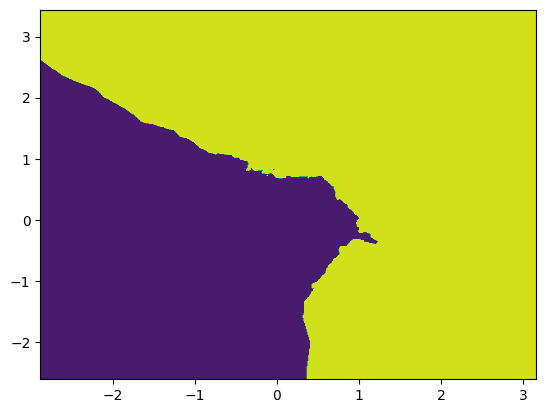

In [77]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

### step 5: Plotting all the training data o n the plot

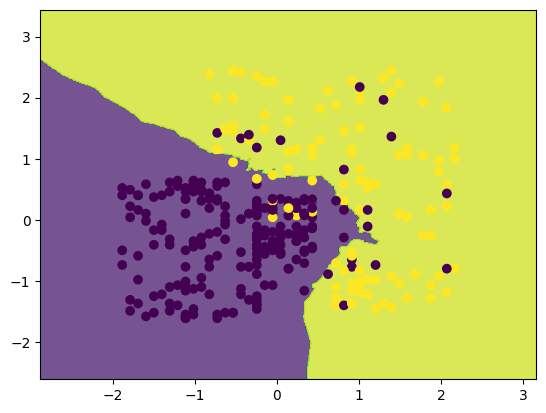

In [80]:
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[41,  4],
       [ 3, 32]], dtype=int64)

In [82]:
# Effect of K on Training Error rate and Validation Error rate

error_train=[]
error_test=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    x=confusion_matrix(y_train,knn.predict(X_train))
    y=confusion_matrix(y_test,knn.predict(X_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())




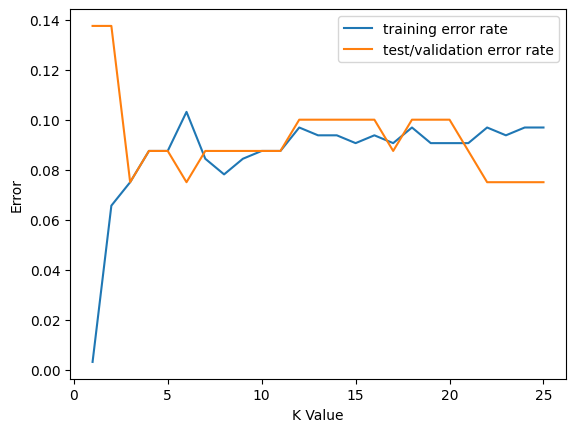

In [83]:
plt.plot(range(1,26),error_train,label='training error rate')
plt.plot(range(1,26),error_test,label='test/validation error rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()

In [84]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

def keffect(data,k):
    data=pd.read_csv('toy_datasets/{}'.format(data))
    X=data.iloc[:,:2].values
    y=data.iloc[:,-1].values

    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)

    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T
    labels=knn.predict(input_array)

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
